**Import the necesary libraries**

Import necesary libraries to start, however more libraries are going to be imported further ahead

In [1]:
import pandas as pd
import calendar
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import scipy.stats as stats

import dataframe_image as dfi


print('Libraries have been imported !')

Libraries have been imported !


**Dataset**

Open the excel file and open the sheet named:  '6. Precio OIC Mensual'
Delete the first 5 Rows and rename the Columns

In [2]:
# to use the URL
#file = 'https://federaciondecafeteros.org/app/uploads/2020/01/Precios-%C3%A1rea-y-producci%C3%B3n-de-caf%C3%A9.xlsx'

# to use the local file
file = pd.ExcelFile('Precios-área-y-producción-de-café.xlsx')

# name of the sheet '6. Precio OIC Mensual'
df = pd.read_excel(file, sheet_name = '6. Precio OIC Mensual')

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,Precios indicativos OIC por grupos - Promedio ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Centavos de dólar por libra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Fuente: ICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Suaves colombianos (arábigo),NaN,NaN,Otros suaves (arábigo),NaN,NaN,Naturales del Brasil (arábigo),NaN,NaN,Robustas,NaN,NaN,NaN


In [3]:
# removes the first column as it doesn't have any data
df = df.drop(df.columns[[0,-1]], axis = 1)

# remove the first 5 columns as is part of the format in the excel file
df = df.drop(index = df.index[0:6],
       axis = 0)

# because the first 5 rows where deleted, I need to reset the index to be 0 and not to start at row # 6
df = df.reset_index(drop=True)

In [4]:
# renames the column for an easier comprenhesion 
df = df.rename(columns = {'Unnamed: 1': 'Date', 'Unnamed: 2':'OIC_price',
                          'Unnamed: 3':'Colombia_ny', 'Unnamed: 4':'Colombia_europe', 'Unnamed: 5':'Colombia_average',
                          'Unnamed: 6':'Other_ny', 'Unnamed: 7':'Other_europe','Unnamed: 8':'Other_average',
                          'Unnamed: 9':'Brazil_ny', 'Unnamed: 10':'Brazil_europe', 'Unnamed: 11':'Brazil_average',
                          'Unnamed: 12':'Robustas_ny', 'Unnamed: 13':'Robustas_europe','Unnamed: 14':'Robustas_average'})
df.head()

,Date,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
0,2000-01-01 00:00:00,82.15,130.12,124.36,130.13,109.17,116.82,111.11,97.67,103.1,97.68,53.62,52.41,53.18
1,2000-02-01 00:00:00,76.15,124.72,118.67,124.73,101.17,110.19,103.44,91.51,96.58,91.51,49.41,47.97,48.85
2,2000-03-01 00:00:00,73.49,119.51,115.78,119.51,98.26,108.13,100.73,89.93,94.78,89.93,47.26,44.73,46.25
3,2000-04-01 00:00:00,69.53,112.67,109.12,112.67,92.41,101.51,94.61,86.46,90.7,86.46,45.21,43.31,44.45
4,2000-05-01 00:00:00,69.22,110.31,107.85,110.31,91.76,100.99,94.17,87.23,91.01,87.23,45.19,43.01,44.32


## Exploratory Data Analysis

### Description of each Column

**Date:** Column expressing the date montly beginning January of 2000, all prices will have a reference for this date.

**OIC_price:** Is the average price of the International Coffee Organization for the month and year shown, measured in US cents/lb

**Colombia_ny:** Is the average price of Colombian Mild Arabicas for the month and year shown and is expresed in US cents/lb, in the US market

**Colombia_europe:** Is the average price of Colombian Mild Arabicas for the month and year shown and is expresed in US cents/lb, in Germany and France

**Colombia_average:** Is the weighted average Colombian Mild Arabicas Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expresed in US cents/lb

**Other_ny:** Is the average price of Other Mild Arabicas for the month and year shown and is expresed in US cents/lb, in the US market

**Other_europe:**  Is the average price of Other Mild Arabicas for the month and year shown and is expresed in US cents/lb, in Germany and France

**Other_average:** Is the average price of Other Mild Arabicas Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expressed in US cents/lb

**Brazil_ny:** Is the average price of Brazilian Naturals for the month and year shown and is expresed in US cents/lb, in the US market

**Brazil_europe:**  Is the average price of Brazilian Naturals for the month and year shown and is expresed in US cents/lb, in Germany and France

**Brazil_average:** Is the average price of Brazilian Naturals Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expressed in US cents/lb

**Robustas_ny:** Is the average price of Robustas for the month and year shown and is expresed in US cents/lb, in the US market

**Robustas_europe:** Is the average price of Robustas for the month and year shown and is expresed in US cents/lb, in Germany and France

**Robustas_average:** Is the average price of Robustas Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expressed in US cents/lb

**[Indicator Prices SC-106/21 ]** (https://www.ico.org/documents/cy2020-21/sc-106e-rules-indicator-prices.pdf)

Checking how many NA's are there in the dataset, what type of each column is, how many columns we have and in general all the information from the data 

In [5]:
# create a copy of the data frame to modify it and to keep the original intact
eda = df.copy()

# checking that both dataframes are diffetent in memory
print(f' Memory for df: {id(df)} ----- Memory for eda: {id(eda)}')

 Memory for df: 1869183069104 ----- Memory for eda: 1869183068432


In [6]:
# exploring the data types, the amount of row and if there are NA's
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              272 non-null    object
 1   OIC_price         272 non-null    object
 2   Colombia_ny       272 non-null    object
 3   Colombia_europe   272 non-null    object
 4   Colombia_average  272 non-null    object
 5   Other_ny          272 non-null    object
 6   Other_europe      272 non-null    object
 7   Other_average     272 non-null    object
 8   Brazil_ny         272 non-null    object
 9   Brazil_europe     272 non-null    object
 10  Brazil_average    272 non-null    object
 11  Robustas_ny       272 non-null    object
 12  Robustas_europe   272 non-null    object
 13  Robustas_average  272 non-null    object
dtypes: object(14)
memory usage: 29.9+ KB


In [7]:
# checking if tehre are NA's 
eda.isna().sum()

Date                0
OIC_price           0
Colombia_ny         0
Colombia_europe     0
Colombia_average    0
Other_ny            0
Other_europe        0
Other_average       0
Brazil_ny           0
Brazil_europe       0
Brazil_average      0
Robustas_ny         0
Robustas_europe     0
Robustas_average    0
dtype: int64

**Duplicates on each column**

Colombia_europe [20 - 40] On years 2001-09 and 2003-05, it was exactly the same price of the coffe

Brazil_ny[75 - 89] On years 2006-04 and 2007-06, it was exactly the same price of the coffe

Other_ny [158 - 159] On years 2013-03 and 2013-04, it was exactly the same price of the coffe

Other_europe [29 - 41] On years 2002-06 and 2003-06, it was exactly the same price of the coffe

Robustas_europe [118 - 119 - 130 - 183] On years 2010-11 and 2020-04, it was exactly the same price of the coffe

Robustas_ny [35 - 39] On years 2002-12 and 2003-04, it was exactly the same price of the coffe


In [8]:
# checking if there are duplicated values 
dup_OIC = eda[eda.duplicated(['OIC_price'],keep = False)]
dup_Col_ny = eda[eda.duplicated(['Colombia_ny'],keep = False)]
dup_Col_europe = eda[eda.duplicated(['Colombia_europe'],keep = False)]
dup_Col_average = eda[eda.duplicated(['Colombia_average'],keep = False)]
dup_Other_ny= eda[eda.duplicated(['Other_ny'],keep = False)]
dup_Other_europe= eda[eda.duplicated(['Other_europe'],keep = False)]
dup_Other_average= eda[eda.duplicated(['Other_average'],keep = False)]
dup_Brazil_ny= eda[eda.duplicated(['Brazil_ny'],keep = False)]
dup_Brazil_europe= eda[eda.duplicated(['Brazil_europe'],keep = False)]
dup_Brazil_average= eda[eda.duplicated(['Brazil_average'],keep = False)]
dup_Robustas_ny= eda[eda.duplicated(['Robustas_ny'],keep = False)]
dup_Robustas_europe= eda[eda.duplicated(['Robustas_europe'],keep = False)]
dup_Robustas_average= eda[eda.duplicated(['Robustas_average'],keep = False)]
#print(dup_Robustas_europe)

The types of the columns are object, Changing them for numeric type float, so we can see the statistics

In [9]:
# changes the format of the column 'Date' for just the year and the month
eda['Date'] = pd.to_datetime(eda['Date'], format = '%d%m%Y')

lista = list(eda.columns)
lista.pop(0)

for item in lista:
    eda[item] = eda[item].astype(float)
    
#checking descriptive statistics
eda.describe()

# saves the table as a png or svg
#df_styled = eda.describe().style.background_gradient()
#dfi.export(df_styled, "table statistics.png")

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,113.633237,153.333888,148.409523,151.222932,145.099616,143.098234,143.966330,118.365112,123.408718,121.959193,79.670588,74.456376,75.376692
std,43.687941,62.437782,59.732402,61.156478,58.414410,55.916915,56.927377,49.732689,51.170812,50.984818,28.448193,26.567300,26.767165
min,41.170000,58.920000,57.720000,58.100000,51.950000,55.760000,54.280000,37.670000,38.710000,38.630000,21.250000,22.790000,22.810000
25%,88.547500,112.940000,111.697500,112.670000,108.720000,110.295000,109.712500,94.405000,96.056883,95.605714,57.895000,54.765000,55.347500
50%,113.155682,144.413636,141.123636,143.529552,141.896818,138.104348,140.704773,111.980000,117.983409,116.833333,84.680554,78.150682,79.203636
75%,133.130252,182.577237,178.760455,179.022500,169.232857,165.942045,166.686126,132.726023,143.199599,140.728880,103.530147,97.329432,98.367841
max,231.240000,319.633750,311.450000,312.950000,303.590000,297.220000,300.120000,271.390000,273.430000,273.400000,126.300000,121.300000,121.980000


The correlation between the attributes

In [10]:
# to check the correlation
eda.corr()

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
OIC_price,1.000000,0.961247,0.974154,0.968370,0.983946,0.987328,0.986648,0.981872,0.988744,0.989057,0.902821,0.883472,0.888010
Colombia_ny,0.961247,1.000000,0.989911,0.997974,0.978964,0.978009,0.977207,0.953280,0.950817,0.952474,0.795684,0.761376,0.768793
Colombia_europe,0.974154,0.989911,1.000000,0.996692,0.979493,0.986822,0.982911,0.962704,0.967117,0.967156,0.810751,0.783200,0.789372
Colombia_average,0.968370,0.997974,0.996692,1.000000,0.981455,0.984258,0.981992,0.959397,0.959980,0.960859,0.802224,0.770656,0.777598
Other_ny,0.983946,0.978964,0.979493,0.981455,1.000000,0.995489,0.996963,0.971176,0.977323,0.977294,0.845858,0.812284,0.819485
Other_europe,0.987328,0.978009,0.986822,0.984258,0.995489,1.000000,0.997574,0.975087,0.984532,0.983430,0.841851,0.813314,0.819732
Other_average,0.986648,0.977207,0.982911,0.981992,0.996963,0.997574,1.000000,0.973195,0.981179,0.980708,0.846334,0.816121,0.822735
Brazil_ny,0.981872,0.953280,0.962704,0.959397,0.971176,0.975087,0.973195,1.000000,0.994153,0.996667,0.838267,0.819359,0.823952
Brazil_europe,0.988744,0.950817,0.967117,0.959980,0.977323,0.984532,0.981179,0.994153,1.000000,0.999492,0.856312,0.837155,0.841898
Brazil_average,0.989057,0.952474,0.967156,0.960859,0.977294,0.983430,0.980708,0.996667,0.999492,1.000000,0.854775,0.835624,0.840293


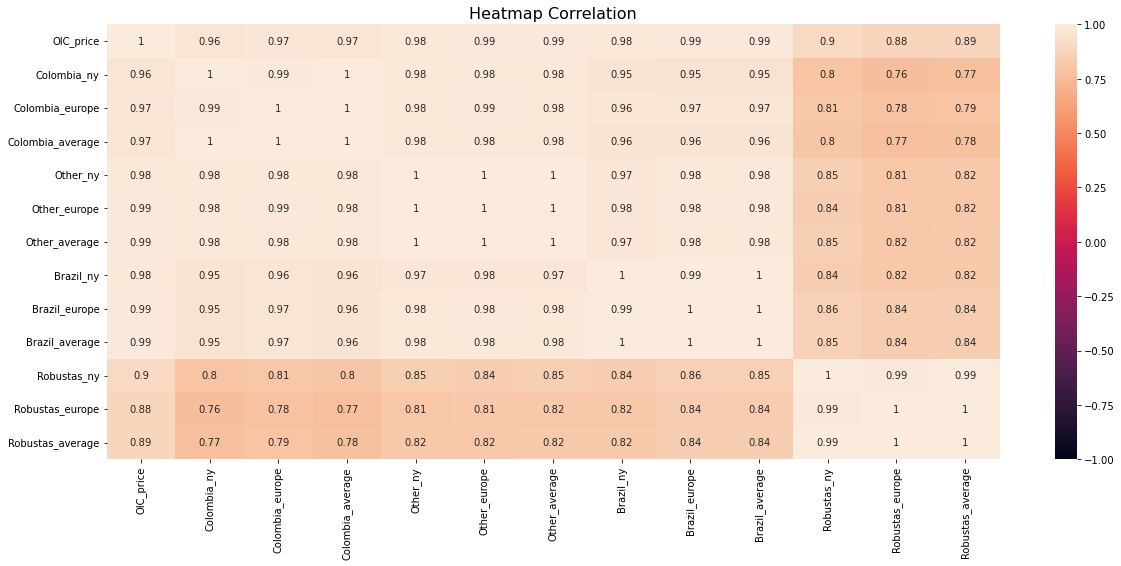

In [11]:
# checking the correlation visually on a heat map

plt.figure(figsize = (20,8))
hm = sns.heatmap(eda.corr(), annot = True, vmin = -1, vmax = 1)
hm.set_title('Heatmap Correlation', fontdict = {'fontsize':16});
#plt.savefig('Heat Map.svg')

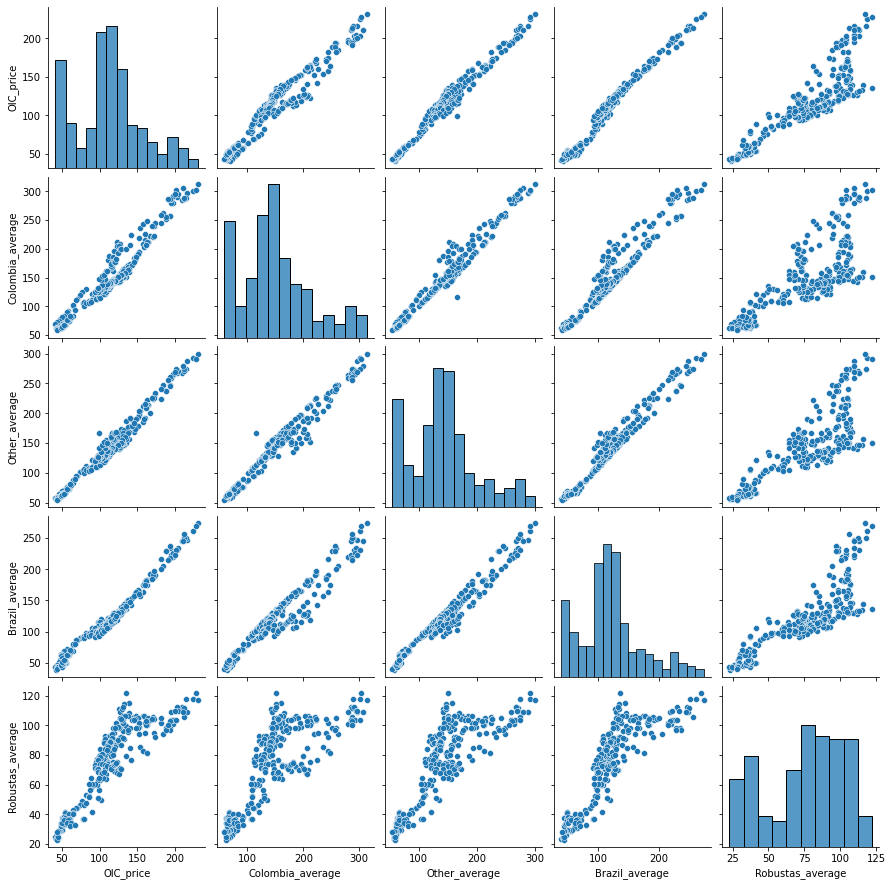

In [12]:
# Doing a scatter plot matrix just with the average columns
sns.pairplot(eda[['OIC_price', 'Colombia_average', 'Other_average', 'Brazil_average', 'Robustas_average']]);
#plt.savefig('scatter plot.svg')

#### Doing a box plot for each of the columns

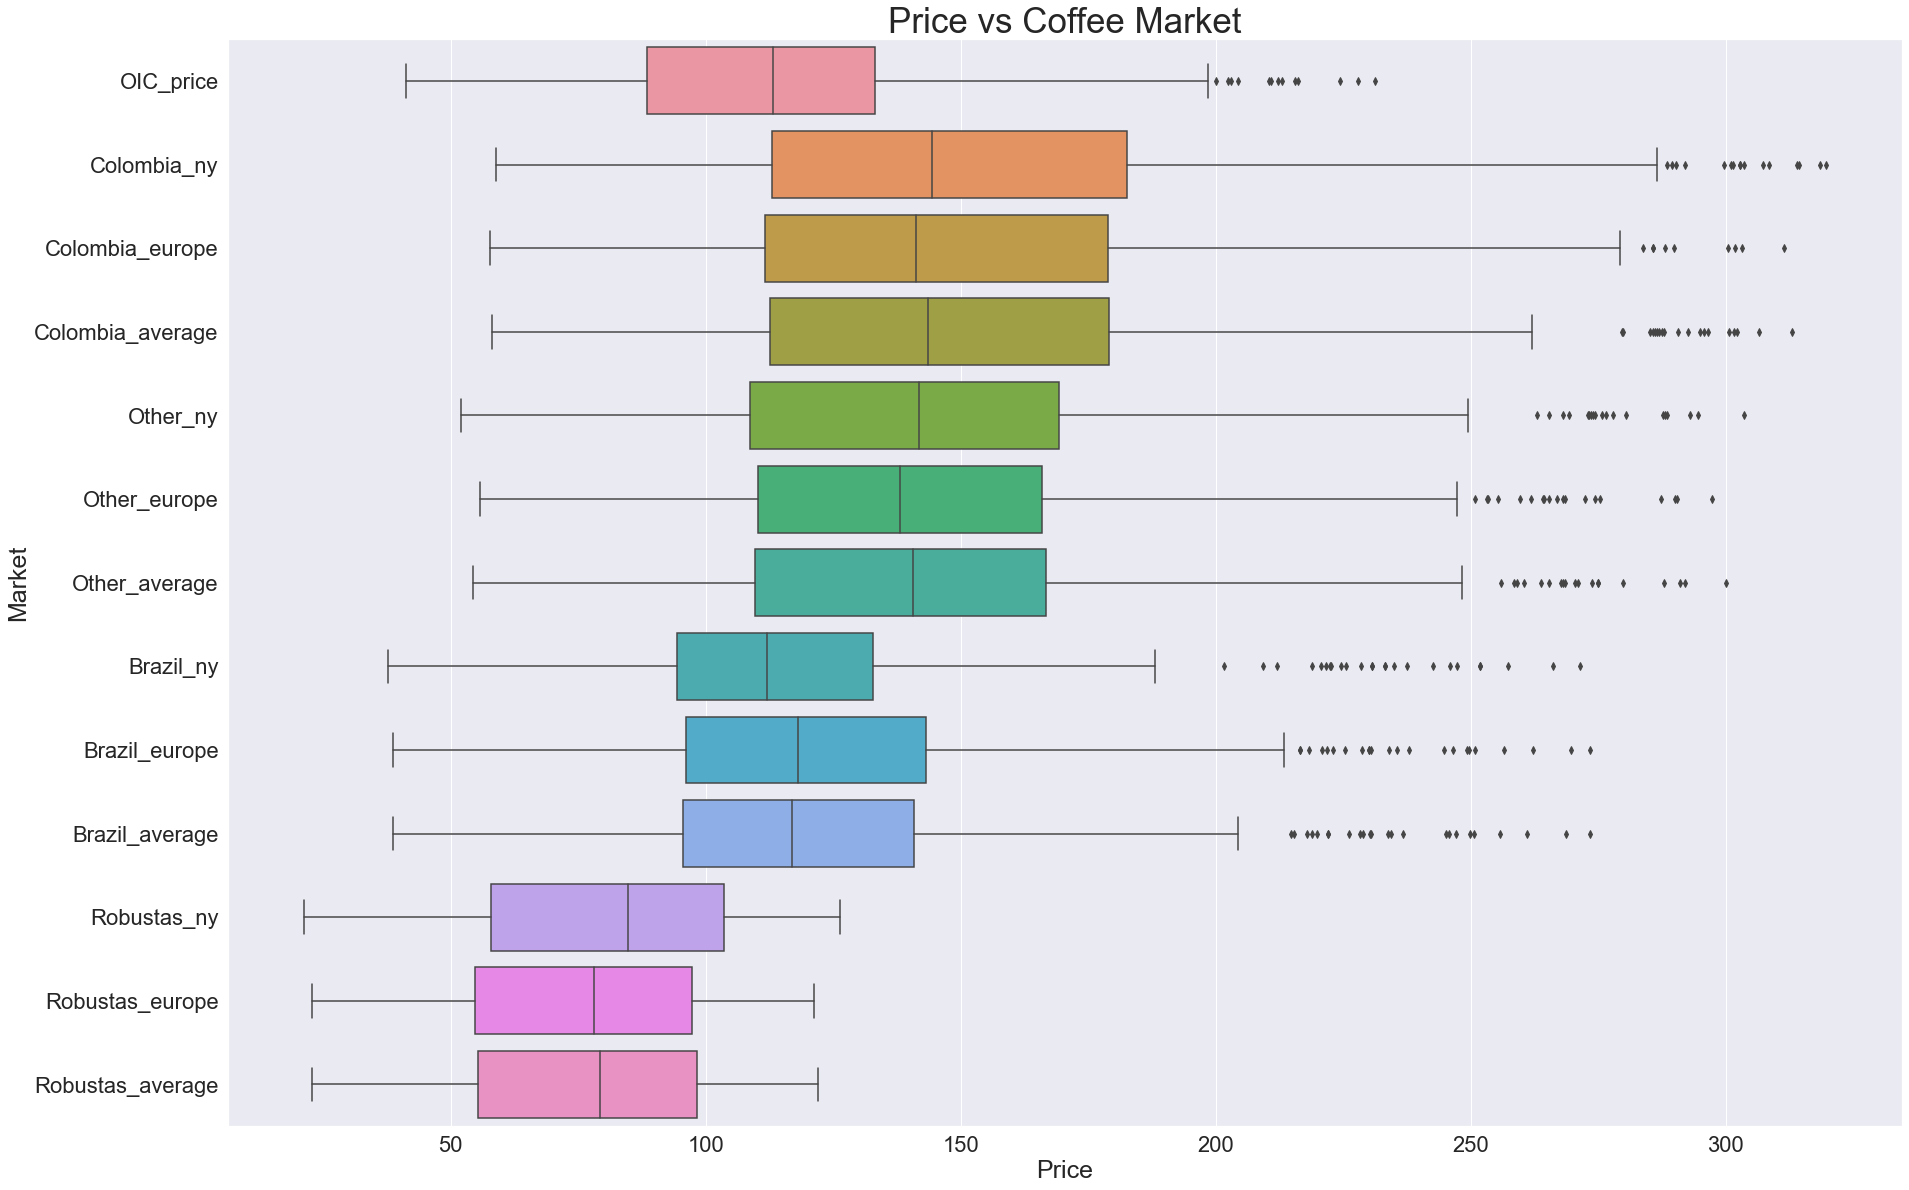

In [13]:
# incresesthe size of the graph
plt.figure(figsize=(30,20))

# increases the size of the font
sns.set(font_scale=2)

# sets the data and the orientation
s = sns.boxplot(data = eda, orient = 'h')

# label in x and the size of it
s.set_xlabel('Price', fontsize = 25)

# label in y and the size of it
s.set_ylabel('Market', fontsize = 25)

# title and its size
s.set_title('Price vs Coffee Market', fontsize = 35)

# show the graph!
plt.show();

The type of coffe Robustas, has the lowest prices, while Colombian Coffee has the highest prices and the 25% of Colombian Coffee price is basically the median of the OIC Price 

Graphing all columns, as a time series, to compare all of them together

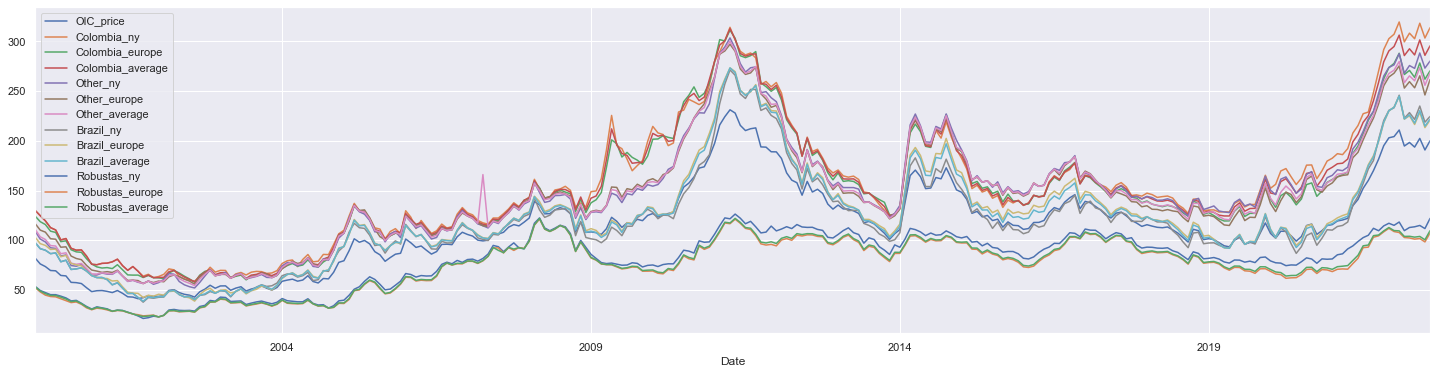

In [14]:
# create a list with th enames of the columns
lista = list(eda.columns)
#  removes the first item of the list, which is 'Date'
lista.pop(0)

# increases the size of the font
sns.set(font_scale=1)
# selects the size of the column
plt.figure(figsize=(25,6))
# plots the axes
ax = plt.gca()

# creates a loop graphing all the columns vs 'Date'
for column in lista:
    eda.plot(x ='Date', y = column, ax = ax)
    
#plt.savefig('Time vs price all.svg')

Comparing just the averages and the OIC prices

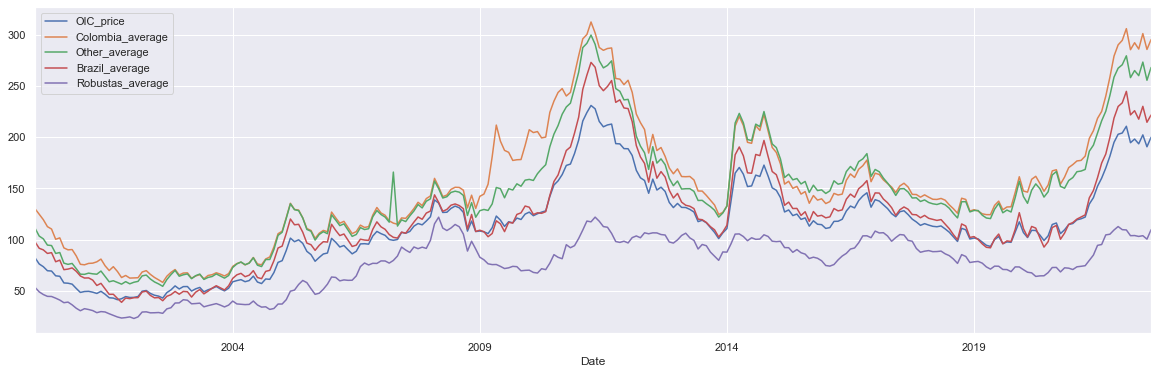

In [15]:
lista_averages = ['OIC_price', 'Colombia_average', 'Other_average', 'Brazil_average', 'Robustas_average']
# selects the size of the column
plt.figure(figsize=(20,6))
# plots the axes
ax = plt.gca()

# creates a loop graphing all the columns vs 'Date'
for column in lista_averages:
    eda.plot(x ='Date', y = column, ax = ax)
    
#plt.savefig('Time vs price averages.svg')

In [16]:
#'OIC_price', 'Colombia_average', 'Other_average', 'Brazil_average', 'Robustas_average'
eda_subset = eda.drop(['Date'], axis = 1)

In [17]:
# counts the number of outliers per column
def IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    x = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    print(f'Number of outliers {str(len(x))}')
    print(f'max outlier {x.max()}, min outlier {x.min()}')

for i in eda_subset:
    print('\n',i)
    print(IQR(eda_subset[i]))


 OIC_price
Number of outliers 13
max outlier 231.24, min outlier 200.11
None

 Colombia_ny
Number of outliers 16
max outlier 319.63375, min outlier 288.43
None

 Colombia_europe
Number of outliers 9
max outlier 311.45, min outlier 283.74
None

 Colombia_average
Number of outliers 19
max outlier 312.95, min outlier 279.55681818181813
None

 Other_ny
Number of outliers 19
max outlier 303.59, min outlier 262.94
None

 Other_europe
Number of outliers 19
max outlier 297.22, min outlier 250.75
None

 Other_average
Number of outliers 19
max outlier 300.12, min outlier 255.90657034106954
None

 Brazil_ny
Number of outliers 25
max outlier 271.39, min outlier 201.60674603174598
None

 Brazil_europe
Number of outliers 23
max outlier 273.43, min outlier 216.46838264311285
None

 Brazil_average
Number of outliers 24
max outlier 273.4, min outlier 214.80402869732916
None

 Robustas_ny
Number of outliers 0
max outlier nan, min outlier nan
None

 Robustas_europe
Number of outliers 0
max outlier nan, 

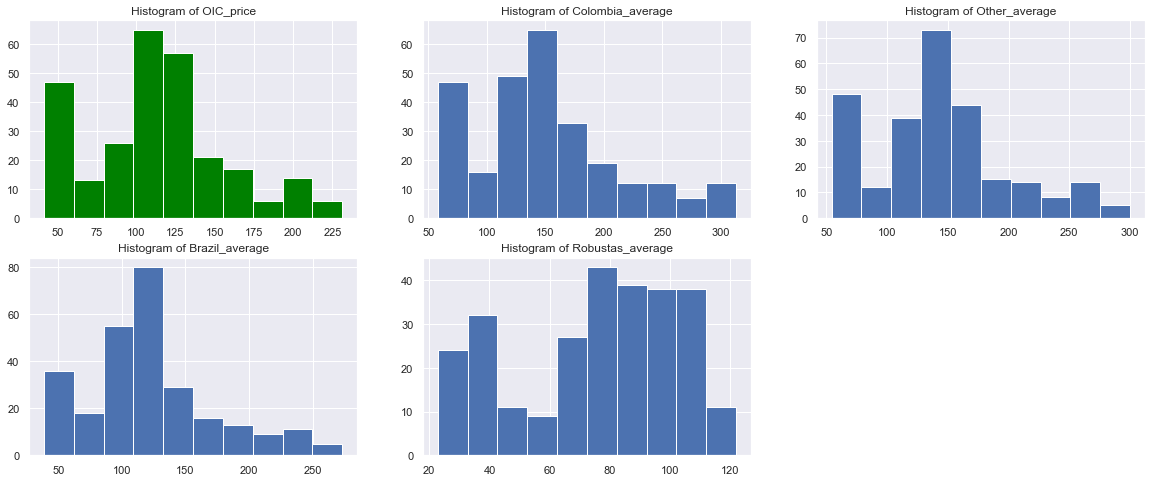

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
plt.hist(eda['OIC_price'], color = 'green')
plt.title('Histogram of OIC_price')

plt.subplot(2,3,2)
plt.hist(eda['Colombia_average'])
plt.title('Histogram of Colombia_average')

plt.subplot(2,3,3)
plt.hist(eda['Other_average'])
plt.title('Histogram of Other_average')

plt.subplot(2,3,4)
plt.hist(eda['Brazil_average'])
plt.title('Histogram of Brazil_average')

plt.subplot(2,3,5)
plt.hist(eda['Robustas_average'])
plt.title('Histogram of Robustas_average');

#plt.savefig('hist averages.svg')

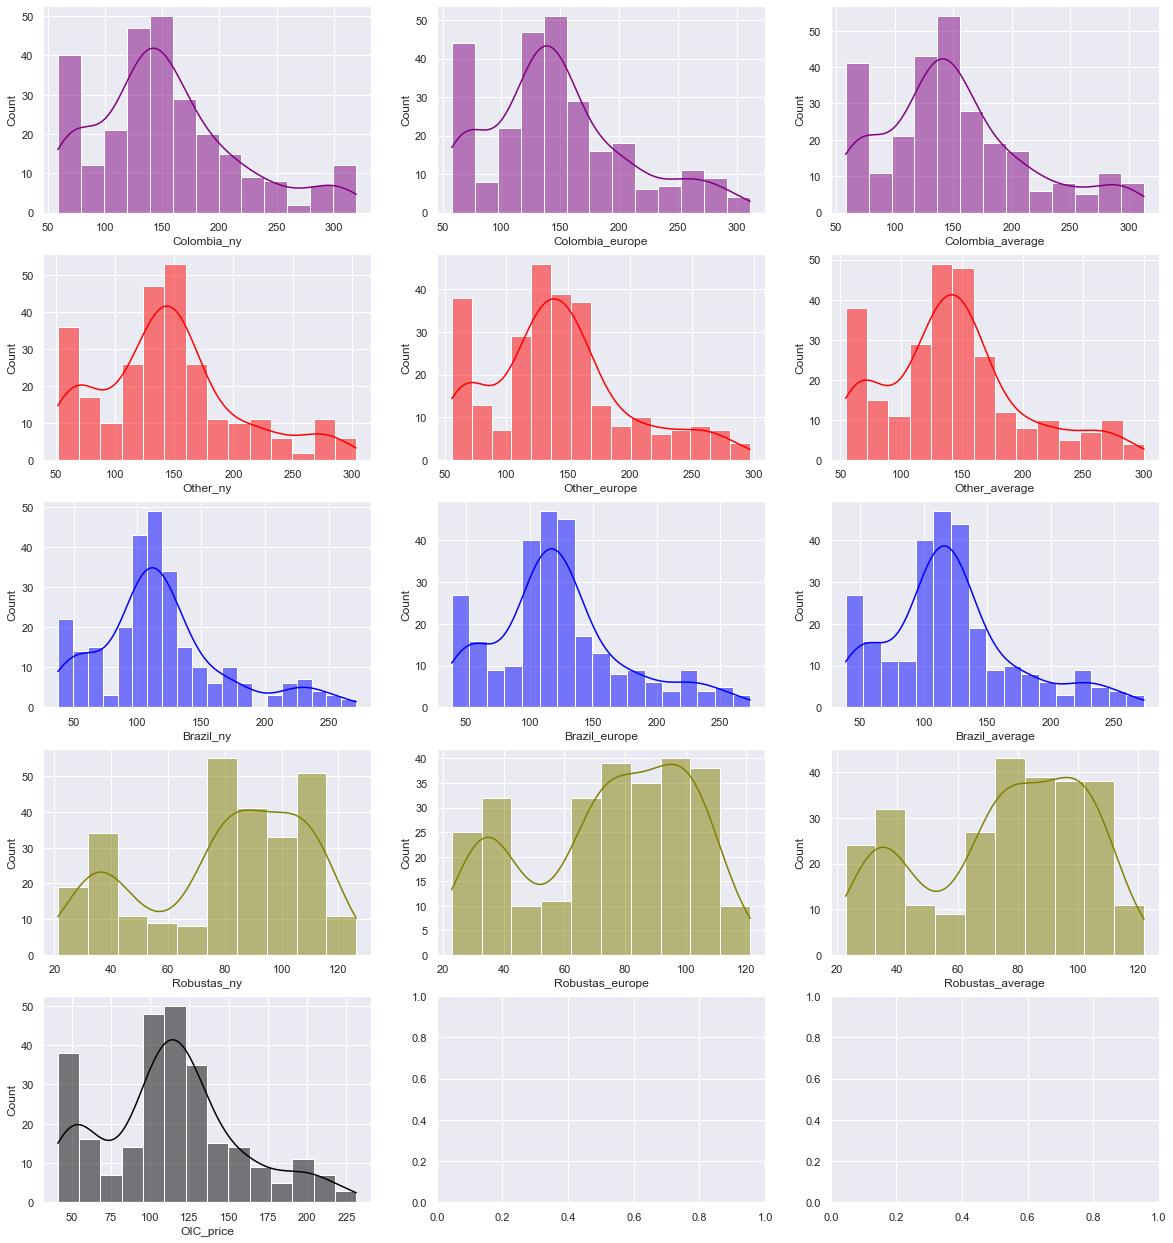

In [42]:
fig, axes = plt.subplots(5,3, figsize = (20,22))
sns.histplot(eda_subset['Colombia_ny'], kde = True, ax = axes[0,0], color = 'purple')
sns.histplot(eda_subset['Colombia_europe'], kde = True, ax = axes[0,1], color = 'purple')
sns.histplot(eda_subset['Colombia_average'], kde = True, ax = axes[0,2], color = 'purple')

sns.histplot(eda_subset['Other_ny'], kde = True, ax = axes[1,0], color = 'red')
sns.histplot(eda_subset['Other_europe'], kde = True, ax = axes[1,1], color = 'red')
sns.histplot(eda_subset['Other_average'], kde = True, ax = axes[1,2], color = 'red')

sns.histplot(eda_subset['Brazil_ny'], kde = True, ax = axes[2,0], color = 'blue')
sns.histplot(eda_subset['Brazil_europe'], kde = True, ax = axes[2,1], color = 'blue')
sns.histplot(eda_subset['Brazil_average'], kde = True, ax = axes[2,2], color = 'blue')

sns.histplot(eda_subset['Robustas_ny'], kde = True, ax = axes[3,0], color = 'olive')
sns.histplot(eda_subset['Robustas_europe'], kde = True, ax = axes[3,1], color = 'olive')
sns.histplot(eda_subset['Robustas_average'], kde = True, ax = axes[3,2], color = 'olive')

sns.histplot(eda_subset['OIC_price'], kde = True, ax = axes[4, 0], color = 'black')
plt.show()

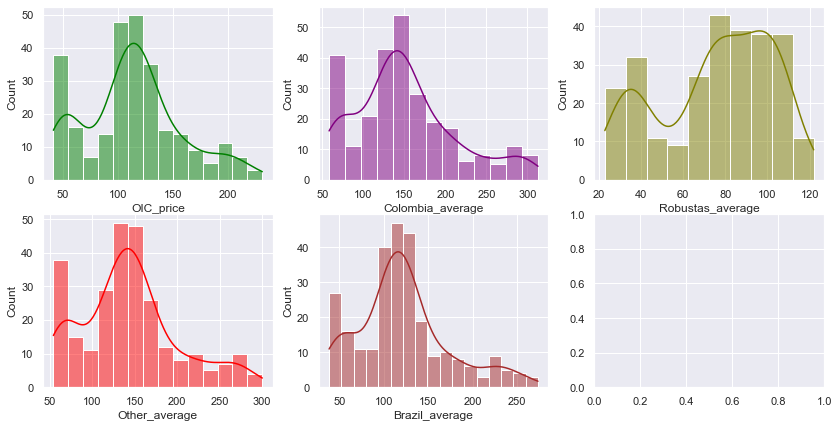

In [21]:
fig, axes = plt.subplots(2,3, figsize = (14,7))
sns.histplot(eda_subset['OIC_price'], kde = True, ax = axes[0, 0], color = 'green')
sns.histplot(eda_subset['Colombia_average'], kde = True, ax = axes[0,1], color = 'purple')
sns.histplot(eda_subset['Other_average'], kde = True, ax = axes[1,0], color = 'red')
sns.histplot(eda_subset['Brazil_average'], kde = True, ax = axes[1,1], color = 'brown')
sns.histplot(eda_subset['Robustas_average'], kde = True, ax = axes[0,2], color = 'olive')
plt.show()

In [ ]:
# grouping by the year and checking the average price every year
eda.groupby(eda['Date'].dt.year).mean()
#df_styled = eda.groupby(eda['Date'].dt.year).mean().style.background_gradient()
#dfi.export(df_styled, "avg per year.svg")

In [ ]:
# 2011 has been the higest price for coffee for 'OIC_price', even 10 years after today!
avg_year = eda.groupby(eda['Date'].dt.year)['OIC_price'].mean()
avg_year.agg(['min','max'])

In [ ]:
# ploting the Average per year
avg_year.plot( kind = 'bar', figsize = (20,7));
#plt.savefig('avg_year.svg')

In [ ]:
# Months of February and March are when the coffe has the highest prices, not a significant increase in price with only 3%
avg_month = eda.groupby(eda['Date'].dt.month_name())['OIC_price'].mean()
avg_month.agg(['min','max'])

In [ ]:
# ploting the average each month
avg_month.plot( kind = 'bar', figsize = (15,4));

In [ ]:
# creates a copy of the original dataframe
test = df.copy()

# saves the column 'Date' as date  and removes the column 'Date' from the new dataframe 'test'
date = test['Date']
test = test.drop(['Date'], axis = 1)

# confirm that has been droped
test.head(3)

### Split the data frame intro X and y

In [ ]:
# creates X and y, with All the columns for X and for y = OIC_price
X = test.iloc[:, 1:].values # All the variables but OIC_price
y = test.iloc[:, 0].values # OIC_price

### Get the OLS (Ordinary Least Squares)

In [ ]:
# # eliminacion hacia atras SL = 0.05 if P-value < Sl, the stays
# import statsmodels.regression.linear_model as sm

# # creates a column of 272 rows with the value 1, to emulate the independant term
# X = np.append(arr = np.ones((272,1)).astype(float), values = X, axis = 1)

In [ ]:
 import statsmodels.regression.linear_model as sm

X_opt = X[: , [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]] # selects the columns, in this case all
X_opt = X_opt.astype(np.float64) # to convert the array as a number
regressor_OLS = sm.OLS(y.astype(float), X_opt.astype(float)).fit() # trains the model to see the OLS
regressor_OLS.summary() # to check the summary

# Criteria: P-Value < 0.05

# columns are:
# 0 = ones column, 1 = 'Colombia_ny', 2 = 'Colombia_europe', 3 ='Colombia_average',
# 4 = 'Other_ny', 5 = 'Other_europe', 6 = 'Other_average', 7 = 'Brazil_ny',
# 8 = 'Brazil_europe', 9 = 'Brazil_average', 10 = 'Robustas_ny', 11 = 'Robustas_europe', 12 = 'Robustas_average'

In [ ]:
# X6 = Other_average, has the highest P-Value = 0.118 > 0.05, therefore I'll remove it and analize again 
X_opt = X[: , [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(y.astype(float), X_opt.astype(float)).fit()
regressor_OLS.summary()

In [ ]:
# X4 = Other_ny has the highest P-Value = 0.075 > 0.05, therefore I'll remove it and analize again
# a regressor without a constant means that the line is going to pass throught the origin
X_opt = X[: , [1, 2, 3, 5, 7, 8, 9, 10, 11]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(y.astype(float), X_opt.astype(float)).fit()
regressor_OLS.summary()

In [ ]:
# model is ready..!!

In [ ]:
# from statsmodels.formula.api import ols
# test[['OIC_price', 'Colombia_ny', 'Colombia_europe', 'Colombia_average', 'Other_ny',
#       'Other_europe', 'Other_average', 'Brazil_ny', 'Brazil_europe', 'Brazil_average',
#       'Robustas_ny', 'Robustas_europe', 'Robustas_average']] = test[['OIC_price', 'Colombia_ny', 'Colombia_europe', 'Colombia_average', 'Other_ny',
#       'Other_europe', 'Other_average', 'Brazil_ny', 'Brazil_europe', 'Brazil_average',
#       'Robustas_ny', 'Robustas_europe', 'Robustas_average']].astype(float)

# #fit multiple linear regression model
# model = ols('OIC_price ~ Colombia_ny + Colombia_europe + Colombia_average + Other_ny + Other_europe + Brazil_ny + Brazil_europe + Brazil_average + Robustas_ny + Robustas_europe + Robustas_average', data=test).fit()

# #view model summary
# print(model.summary())

### Split the data frame intro Train set (X) and Test set (y)

In [ ]:
from sklearn.model_selection import train_test_split

# create X_train,X_test,y_train,y_test FROM the variables X and y, using 30% of the dataset for testing.
X_train, X_test, y_train, y_test = train_test_split(X_opt,y, test_size = 0.3, random_state=10)

print(f'X_train: {len(X_train)} elements  |  y_train: {len(y_train)} elements')
print(f'X_test: {len(X_test)} elements    |  y_test: {len(y_test)} elements')

## Linear Regression

In [ ]:
#importing th necesary libraries
from sklearn.linear_model import LinearRegression

# create the linear regression model
model_regression = LinearRegression()

# train the model
model_regression.fit(X_train, y_train)

#obtain a prediction
predicted_regression = model_regression.predict(X_test)

R2 won't say anything about how far or close each predicted value is from the real data, it tells us how much of our target is being captured by our model.



In [ ]:
# checking the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# call the metrics and saves them
mae = mean_absolute_error(y_test, predicted_regression)
mse = mean_squared_error(y_test, predicted_regression)
r2 = r2_score(y_test, predicted_regression)
score_train = model_regression.score(X_train, y_train)

print("The model metrics are")
print("--------------------------------------")
print(f'Mean Absolute Error is {mae}')
print(f'Mean Squared Error is {mse}')
print(f'Root mean Squared Error on Test data is {r2*100} %')
print(f'Root mean Squared Error on Train data is {score_train*100} %')

In [ ]:
# creates an empty dataframe to store the results for the metrics 
errors = pd.DataFrame()
errors['Metrics'] =['Mean Absolute Error', 'Mean Squared Error %', 'Root mean Squared Error on test %', 'Root mean Squared Error on train % %']
errors['Linear_regression'] = [mae, mse, r2*100, score_train*100]
errors.head(5)

In [ ]:
# creates an empty dataframe to store the results
results = pd.DataFrame()
results['actual'] = y_test
results['predicted_regression'] = predicted_regression
results.head(5)

In [ ]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_regression, results.actual, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual.min(), results.actual.max()], [results.actual.min(), results.actual.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted Regression')

# set label in Y
ax.set_ylabel('Actual')

# to show the plot
plt.show()

In [ ]:
# Plotting Actual price vs predicted price
results.plot(kind='bar',figsize=(25,15))
plt.show()

In [ ]:
# calling the coefficents and the intercept of the equation that governs the regression
print(f'Intercept: {model_regression.intercept_}')
print(f'Coefficients: {model_regression.coef_}')

### Decision Tree Regressor

In [ ]:
# import the necesary libraries
from sklearn.tree import DecisionTreeRegressor

# create the model
model_tree = DecisionTreeRegressor(random_state=10)

# train the model
model_tree.fit(X_train, y_train)

# obtain the prediction
predicted_tree = model_tree.predict(X_test)

In [ ]:
# calls the metrics and saves them
mae = mean_absolute_error(y_test, predicted_tree)
mse = mean_squared_error(y_test, predicted_tree)
r2 = r2_score(y_test, predicted_tree)
score_train = model_tree.score(X_train, y_train)

print("The model metrics are")
print("--------------------------------------")
print(f'Mean Absolute Error is {mae}')
print(f'Mean Squared Error is {mse}')
print(f'Root mean Squared Error on Test data is {r2*100} %')
print(f'Root mean Squared Error on Train data is {score_train*100} %')

In [ ]:
# creates an empty dataframe to store the results for the metrics 
errors['Regression_Tree'] = [mae, mse, r2*100, score_train*100]
errors.head(5)

In [ ]:
# adds the results to the recently created dataframe 
results['predicted_tree'] = predicted_tree
results.head(5)

In [ ]:
# # creates a linear regression decision tree
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20,8))#, dpi=100)
# plot_tree(model_tree, feature_names=X.columns, fontsize = 12);

In [ ]:
# creates a linear regression decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,8))
plot_tree(model_tree, feature_names=X_opt, filled = True);

In [ ]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_tree, results.actual, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual.min(), results.actual.max()], [results.actual.min(), results.actual.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted Tree')

# set label in Y
ax.set_ylabel('Actual')

# to show the plot
plt.show()

### LASSO Regressor (Least Absolute Shrinkage and SelectionOperator)

In [ ]:
# import the necesary libraries
from sklearn.linear_model import Lasso

# creates the model
lasso_regressor = Lasso(fit_intercept=False)

# train the model
lasso_regressor.fit(X_train, y_train)

# obtain the predictions
predicted_lasso = lasso_regressor.predict(X_test)


In [ ]:
# calls the metrics and saves them
mae = mean_absolute_error(y_test, predicted_lasso)
mse = mean_squared_error(y_test, predicted_lasso)
r2 = r2_score(y_test, predicted_lasso)
score_train = lasso_regressor.score(X_train, y_train)

print("The model metrics are")
print("--------------------------------------")
print(f'Mean Absolute Error is {mae}')
print(f'Mean Squared Error is {mse}')
print(f'Root mean Squared Error on Test data is {r2*100} %')
print(f'Root mean Squared Error on Train data is {score_train*100} %')

In [ ]:
# creates an empty dataframe to store the results for the metrics 
errors['Regression_Lasso'] = [mae, mse, r2*100, score_train*100]
errors.head(5)

In [ ]:
results['predicted_lasso'] = predicted_lasso
results.head(5)

In [ ]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_lasso, results.actual, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual.min(), results.actual.max()], [results.actual.min(), results.actual.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted LASSO')

# set label in Y
ax.set_ylabel('Actual')

# to show the plot
plt.show()

## SVM Support Vector Machine Regressor

In [ ]:
# in LR the idea is to minimize the error between prediction and the data
# in SVR the idea is that the errors don't surpass the stablished umbral

In [ ]:
from sklearn.model_selection import train_test_split

# create X_train,X_test,y_train,y_test FROM the variables X and y, using 30% of the dataset for testing.
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.3, random_state=10)

print(f'X_train: {len(X_train)} elements  |  y_train: {len(y_train)} elements')
print(f'X_test: {len(X_test)} elements    |  y_test: {len(y_test)} elements')

In [ ]:
# import the necesary libraries
from sklearn.svm import SVR

# creates the model
svm_regressor = SVR(kernel = 'rbf') # radial base function or gaussian

# train the model
svm_regressor.fit(X_train, y_train)

# obtain the predictions
svm_predicted = svm_regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, svm_predicted)
mse = mean_squared_error(y_test, svm_predicted)
r2 = r2_score(y_test, svm_predicted)
score_train = svm_regressor.score(X_train, y_train)

print("The model metrics are")
print("--------------------------------------")
print(f'Mean Absolute Error is {mae}')
print(f'Mean Squared Error is {mse}')
print(f'Root mean Squared Error on Test data is {r2*100} %')
print(f'Root mean Squared Error on Train data is {score_train*100} %')

In [ ]:
# creates an empty dataframe to store the results for the metrics 
errors['SVM_Regression'] = [mae, mse, r2*100, score_train*100]
errors.head(5)

In [ ]:
results['predicted_svm'] = svm_predicted
results.head(5)

In [ ]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_svm, results.actual, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual.min(), results.actual.max()], [results.actual.min(), results.actual.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted SVM')

# set label in Y
ax.set_ylabel('Actual')

# to show the plot
plt.show()

## SVM Support Vector Machine Regressor Normalized

In [ ]:
# SVM are sensitive to feature scales, so is better to scale or Normalize the dataframe
# using Standard Scaler and MinMax Scaler
# I have to use train and test again, with the normalized values

In [ ]:
# creates a copy of the original dataframe
test = df.copy()

# saves the column 'Date' as date  and removes the column 'Date' from the new dataframe 'test'
date = test['Date']
test = test.drop(['Date'], axis = 1)

# confirm that has been droped
test.head(3)

In [ ]:
# creates X and y, with All the columns for X and for y = OIC_price
X = test.iloc[:, 1:].values # All the variables but OIC_price
y = test.iloc[:, 0].values # OIC_price

In [ ]:
# Function that applies standarization with the Standar deviation to the dataframe and then adds the names to the columns
from sklearn.preprocessing import StandardScaler

# normalizing with standar deviation
X_scaler = StandardScaler()
y_scaler = StandardScaler()
    
# fits and transforms the data
X = X_scaler.fit_transform(X)
y = y.reshape(-1,1) # reshape because the array has to be a 2D array or (1 column, many rows..)
y = y_scaler.fit_transform(y)    

In [ ]:
from sklearn.model_selection import train_test_split

# create X_train,X_test,y_train,y_test FROM the variables X and y, using 30% of the dataset for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

print(f'X_train: {len(X_train)} elements  |  y_train: {len(y_train)} elements')
print(f'X_test: {len(X_test)} elements    |  y_test: {len(y_test)} elements')

In [ ]:
# import the necesary libraries
from sklearn.svm import SVR

# creates the model
svm_regressor = SVR(kernel = 'rbf') # radial base function or gaussian

# train the model
svm_regressor.fit(X_train, np.ravel(y_train, order = 'c')) 
# Explanation: .values will give the values in a numpy array (shape: (n,1))
#              .ravel will convert that array shape to (n, ) (i.e. flatten it)

# obtain the predictions
svm_predicted = svm_regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, svm_predicted)
mse = mean_squared_error(y_test, svm_predicted)
r2 = r2_score(y_test, svm_predicted)
score_train = svm_regressor.score(X_train, y_train)

print("The model metrics are")
print("--------------------------------------")
print(f'Mean Absolute Error is {mae}')
print(f'Mean Squared Error is {mse}')
print(f'Root mean Squared Error on Test data is {r2*100} %')
print(f'Root mean Squared Error on Train data is {score_train*100} %')

In [ ]:
# creates an empty dataframe to store the results for the metrics 
errors['SVM_Regression_norm'] = [mae, mse, r2*100, score_train*100]
errors.head(5)

In [ ]:
results['predicted_svm'] = svm_predicted
results['actual_scaled'] = y_test
results.head(5)

In [ ]:
# plotting Actual Scaled vs Predicted SVM
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_svm, results.actual_scaled, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual_scaled.min(), results.actual_scaled.max()], [results.actual_scaled.min(), results.actual_scaled.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted SVM')

# set label in Y
ax.set_ylabel('Actual Scaled')

# to show the plot
plt.show()

### Neural Network

In [ ]:
# #dense layer (from one neuron to all neurons)
# #units = 1, the number of output layers (in this case, I need OIC_price, which is 1 neuron)
# #input_shape = 4, is the amount of input neurons, in this case I have 4 values: 
#              #'Colombia_average','Other_average','Brazil_average','Robustas_average'
# layer = tf.keras.layers.Dense(units = 1, input_shape = [4])

# #I have to build a model for the layers, in this case is the Sequential that is for a neural network thta is not advanced
# model = tf.keras.Sequential([layer])

In [ ]:
# # I have to prepare the model to be trained (this is called compiler)
# # I use an optimizer called Adam, allows the network how to use the bias and weights in an efficient way
# # so it t it learns and instead of unlearning ( get better step by step)
# # learning rate is 0.1, which indicates how to adjust the weights and bias

# # for a loss I am going to use 'mean_squared_error', basically small amount of big errors is worst that biga amount of small errors
# model.compile(
#     optimizer = tf.keras.optimizers.Adam(0.1),
#     loss ='mean_squared_error'
# )

In [ ]:
# print('Begining Training...')
# # epochs  = 1000 , is how many times I want it to loop (1 loop mean checking all 272 entries)
# # usually the more epochs better training but only until certain point
# # verbose = false, so it doesn't print anything
# historial = model.fit(X,y,epochs = 1000, verbose = False)
# print('Model has been trained!')

In [ ]:
# # to see the loss, basiucally how bad are the results with each loop taht it did
# plt.xlabel('# Epoch')
# plt.ylabel('Loss')
# plt.plot(historial.history['loss'])

In [ ]:
# print('Hagamos una prediccion!')
# resultado = modelo.predict([[0.498960], [0.552066], [0.531882], [0.758294]])
# print(f'El resultado es {resultado} OIC_price!')


In [ ]:
# print('variables internas del modelo')
# print(layer.get_weights())
# # y = C*1.7981566 + 31.92808

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
celsius_q = np.array([-40, -10,  0,  8, 15, 22,  38], dtype = float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [ ]:
capa = tf.keras.layers.Dense(units = 1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

In [ ]:
modelo.compile(loss="mean_squared_error", optimizer = tf.keras.optimizers.Adam(0.1))
history = modelo.fit(celsius_q, fahrenheit_a, epochs = 500, verbose=False)
print("Finished training the model")
print(modelo.predict([100.0]))
print("These are the layer variables: {}".format(capa.get_weights()))

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [ ]:
print('Hacer prediccion')
resultado = modelo.predict([100])
print(resultado)